<h2>Q2:由參與者的學習年份與同理心的相關性，來探討讀醫學系是否會增加同理心</h2>

In [2]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats
import statsmodels.stats.weightstats
import matplotlib.pyplot as plt
# read in our data
med_df = pd.read_csv("C:/Users/ASUS/Desktop/Data Carrard et al. 2022 MedTeach.csv")
#med_df

               year  erec_mean
year       1.000000   0.080132
erec_mean  0.080132   1.000000


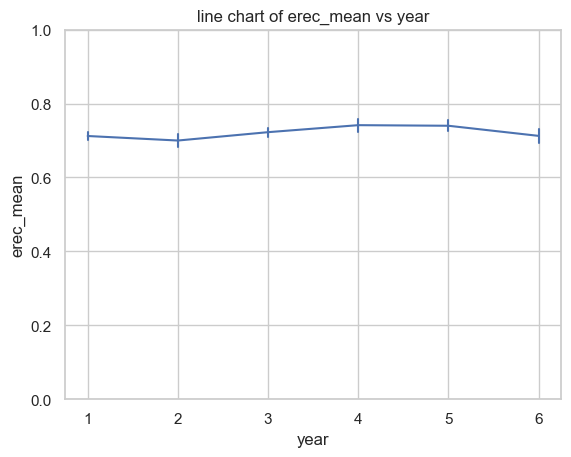

In [3]:
#首先，從圖直觀的獲取資訊
sb.set(style="whitegrid")
categorical = med_df[['year', 'erec_mean']].copy()
ax = sb.lineplot(data = med_df,x=med_df['year'], y= med_df['erec_mean'],err_style='bars',linewidth=1.5)
ax.set(ylim=(0, 1))
ax.set_title("line chart of erec_mean vs year")
#學習年份和同理心的相關係數
print(categorical.corr())


<h3>直觀的從圖中得知，隨著學習年份的增加，同理心似乎沒有大幅度的增加</h3>

<h3>他們之間的相關係數，也相當低</h3>

<h2>描述統計</h2>

<h3>首先，我們特別取出 "學習年份1年與同理心" 和 "學習年份6年與同理心" 的資料，再利用圖表觀察</h3>

In [4]:
#讀取學習年份1年、6年和同理心的資料
#print(type(med_df['year'][0]))
erec1_df = med_df['erec_mean'].loc[med_df['year']==1]
erec6_df = med_df['erec_mean'].loc[med_df['year']==6]
print(f'學習年份為1年的描述統計:')
print(erec1_df.describe())
print(f'學習年份為6年的描述統計:')
print(erec6_df.describe())

學習年份為1年的描述統計:
count    245.000000
mean       0.712245
std        0.094739
min        0.357143
25%        0.642857
50%        0.714286
75%        0.785714
max        0.904762
Name: erec_mean, dtype: float64
學習年份為6年的描述統計:
count    113.000000
mean       0.712600
std        0.102197
min        0.404762
25%        0.642857
50%        0.738095
75%        0.785714
max        0.904762
Name: erec_mean, dtype: float64


|      | count  |  mean    | std    |  min  | 25%     |  50%     | 75%  | max  |
|  ----  | ----  |  ----   | ----   | ----   |----     |----      |----   |----    |
| 學習年份為1年的erec_mean  | 245 | 0.7122  | 0.0947 |0.3571   |  0.6428  |  0.7142|0.7857 | 0.9047  | 
| 學習年份為6年的erec_mean  | 113 | 0.7126  | 0.1021 | 0.4047  |0.6428   |0.7380     |0.7857 |0.9047 |



[(0.2, 1.0)]

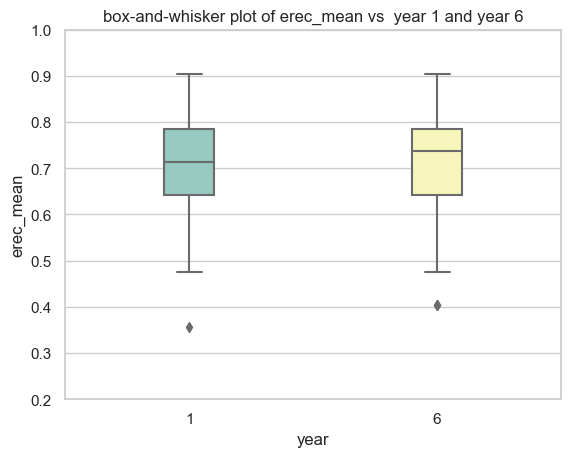

In [5]:
#先整理出year=1和year=6的rows
year_1_and_6_df = pd.concat([med_df.loc[med_df['year']==1],med_df.loc[med_df['year']==6]])
year_1_and_6_df
#data visualization
sb.set(style="whitegrid")
ax = sb.boxplot(x = "year", y = "erec_mean", data = year_1_and_6_df, width=0.2, palette="Set3")
ax.set_title("box-and-whisker plot of erec_mean vs  year 1 and year 6")
ax.set(ylim=(0.2, 1))

<h3>學習年份1年的醫學生和學習年份6年的醫學生，兩者的erec_mean數值相當接近</h3>

<h2>檢定統計</h2>

<h3>首先，檢查資料是否為常態分布 (H0:資料為常態分佈 vs H1:資料非常態分布):</h3>

In [6]:
print(scipy.stats.shapiro(erec1_df))
print(scipy.stats.shapiro(erec6_df))

ShapiroResult(statistic=0.983893632888794, pvalue=0.0071376655250787735)
ShapiroResult(statistic=0.9699805974960327, pvalue=0.012043386697769165)


<h3>
就讀1年的資料: p-value=0.0071376655250787735

p-value ~= 0.0071 < 0.05，我們棄卻H0，資料並不是常態分佈。
</h3>
<h3>
就讀6年的資料: p-value=0.012043386697769165

p-value ~= 0.012 < 0.05，我們棄卻H0，資料並不是常態分佈。
</h3>

<h3>不過因為資料數較大(>=30)，理論上可以將他們可以視為近似常態分佈的資料</h3>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15844\3538481915.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(erec1_df, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15844\3538481915.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(erec6_df, ax=ax[1])


[Text(0.5, 0, 'erec_mean'), Text(0, 0.5, 'Density')]

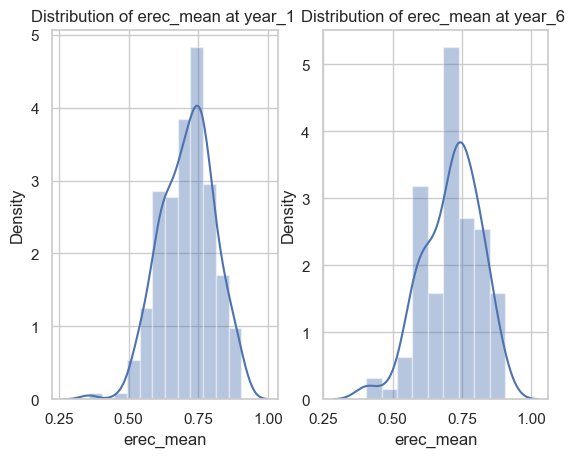

In [10]:
fig, ax = plt.subplots(1,2)
sb.distplot(erec1_df, ax=ax[0])
ax[0].set_title("Distribution of erec_mean at year_1 ")
ax[0].set(xlabel='erec_mean', ylabel='Density')
sb.distplot(erec6_df, ax=ax[1])
ax[1].set_title("Distribution of erec_mean at year_6 ")
ax[1].set(xlabel='erec_mean', ylabel='Density')

<h3>由圖得知，兩者的分布圖的確近似鐘形曲線 !</h3>

<h3>
接下來建立H0:mean1 = mean2 vs H1:mean1 < mean2

(mean1為學習年份1年的mean, mean2為學習年份6年的mean)
</h3>

In [215]:
statsmodels.stats.weightstats.ztest(erec1_df, erec6_df, alternative='smaller')

(-0.03215196685851104, 0.4871754306243695)

<h3>pvalue ~= 0.4871 > 0.05 故我們不棄卻H0</h3>

<h2>結論</h2>

<h3>在顯著水準為0.05的情況下，學習年份1年的醫學生之同理心和學習年份6年的醫學生沒有變化</h3>